In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [184]:
project_data = pd.read_csv('Проект Питон данные - Лист1.csv')
project_data.head()

,id,Никнейм,Цена хэд,Цена халф,Цена фулл,"Время, скетч","Время, лайн","Время, рендер","Время, общение с заказчиком",Количество бесплатных правок,Дедлайн,Скидки/доплаты,Основная платформа,Заказов за месяц (в среднем)
0,0,Liqqris,1200,1900,2500,1,1,2,4,5,30,доплата сложный дизайн,Telegram,4
1,1,littlebird,1000,1500,3000,"0,5","0,5","0,5","1,5",1,60,"доплата сложный дизайн, фон",Telegram,"1,5"
2,2,MaidM,600,1500,2000,2,4,4,4,5,14,доплата сложный дизайн,Telegram,4
3,3,SunRR,600,1200,2000,"1,5","4,5",9,27,4,30,доп персонаж дороже,Telegram,27
4,4,Sorano,2200,4000,4600,2,6,6,12,0,120,NaN,Telegram,12


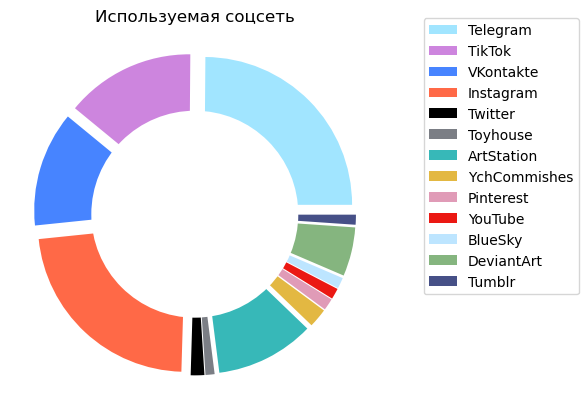

In [185]:
socials = dict()
for i in project_data['Основная платформа']:
    if i not in socials:
        socials[i] = 0
    socials[i] += 1
#print(socials.keys())
my_colors = ['#A1E5FF', '#CD85DE', '#4784FF', '#FF6947', 'black',
          '#7B7E85', '#37B8B8', '#E3B842', '#E09BB7', '#EB1813',
          '#BDE5FF', '#85B57F', '#465087']
plt.pie(socials.values(), colors=my_colors, explode=[0.09]*len(socials))
plt.legend(socials.keys(), bbox_to_anchor=(1.1, 1.05))
circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.savefig('piechart1.png', bbox_inches='tight')
plt.title('Используемая соцсеть')
plt.show()

Среднее количество заказов в месяц - 6


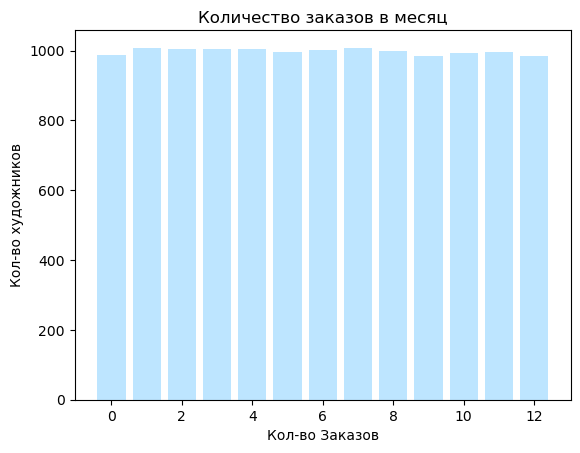

In [135]:
project_comm = project_data.sort_values(by='Заказов за месяц (в среднем)', ascending=True)
plt.bar(project_comm['Заказов за месяц (в среднем)'], project_comm['id'], color = '#BDE5FF')
print(f'Среднее количество заказов в месяц - {int(np.ceil(np.mean(project_comm['Заказов за месяц (в среднем)'])))}')
plt.title('Количество заказов в месяц')
plt.xlabel('Кол-во Заказов')
plt.ylabel('Кол-во художников')
plt.savefig('histogram1.png', bbox_inches='tight')
plt.show()

In [149]:
price_head = project_data['Цена хэд']
price_half = project_data['Цена халф']
price_full = project_data['Цена фулл']
project_data['Средняя цена'] = price_full + price_half + price_head / 3
project_data.tail()
#plt.plot(project_data['id'], project_data['Средняя цена'], color = '#BDE5FF')
#project_data = project_data.sort_values(by='Средняя цена', ascending=False)

,id,Никнейм,Цена хэд,Цена халф,Цена фулл,"Время, скетч","Время, лайн","Время, рендер","Время, общение с заказчиком",Количество бесплатных правок,Дедлайн,Скидки/доплаты,Основная платформа,Заказов за месяц (в среднем),Затраты времени,Средняя цена
993,993,Pixel,3880,11728,14294,5,15,45,135,0,41,NaN,Telegram,135,200.0,27315.333333
234,234,Еж,1210,9286,18255,5,15,45,135,3,129,NaN,ArtStation,135,200.0,27944.333333
623,623,Мем,1490,8024,12583,5,15,45,135,5,331,NaN,ArtStation,135,200.0,21103.666667
271,271,Лягушка,4945,11812,14984,5,15,45,135,1,128,NaN,Instagram,135,200.0,28444.333333
432,432,Равенство,2290,9749,15993,5,15,45,135,0,194,NaN,TikTok,135,200.0,26505.333333


Среднее затраченное время на общение - 53.3880427757929%


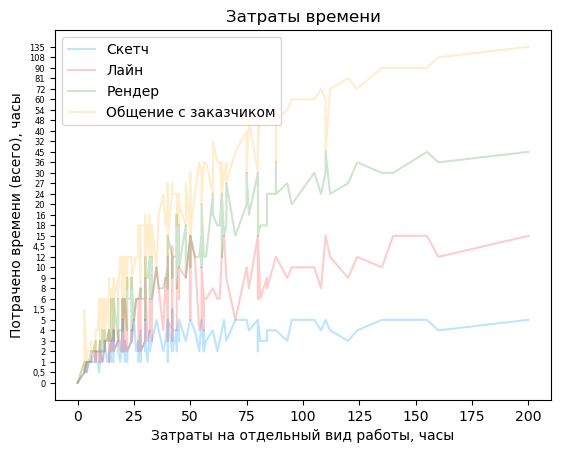

In [182]:
project_data.head()
project_data['Затраты времени'] = project_data['Время, скетч'].str.replace(',','.').astype(float) + project_data['Время, лайн'].str.replace(',','.').astype(float) + project_data['Время, рендер'].str.replace(',','.').astype(float) + project_data['Время, общение с заказчиком'].str.replace(',','.').astype(float)
print(f'Среднее затраченное время на общение - {np.mean(project_data['Время, общение с заказчиком'].str.replace(',','.').astype(float) / np.mean(project_data['Затраты времени'])) * 100}%')
project_data = project_data.sort_values(by='Затраты времени', ascending=True)
plt.plot(project_data['Затраты времени'], project_data['Время, скетч'], color = '#BDE5FF', label='Скетч')
plt.plot(project_data['Затраты времени'], project_data['Время, лайн'], color = 'red', alpha=0.2, label='Лайн')
plt.plot(project_data['Затраты времени'], project_data['Время, рендер'], color = 'green', alpha=0.2, label='Рендер')
plt.plot(project_data['Затраты времени'], project_data['Время, общение с заказчиком'], color = 'orange', alpha=0.2, label='Общение с заказчиком')
#plt.plot(project_data['id'], project_data['Время, скетч'], color = '#BDE5FF', label='test')
plt.legend()
plt.title('Затраты времени')
plt.xlabel('Затраты на отдельный вид работы, часы')
plt.ylabel('Потрачено времени (всего), часы')
plt.yticks(fontsize='6')
plt.savefig('plot1.png', bbox_inches='tight')
plt.show()

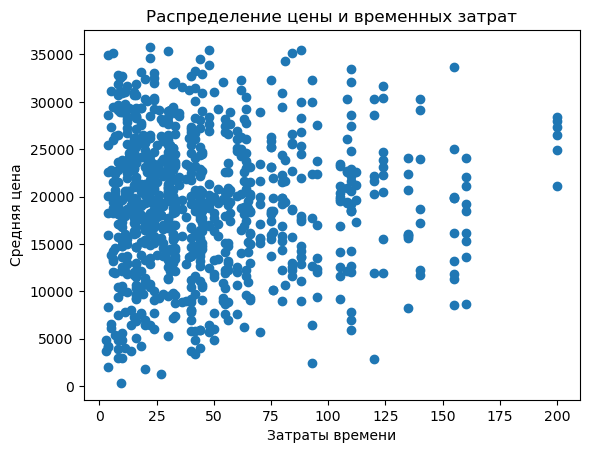

In [162]:
project_data = project_data.sort_values(by='Затраты времени', ascending=True)
filter = project_data['Затраты времени'] != 0
plt.scatter(project_data[filter]['Затраты времени'], project_data[filter]['Средняя цена'])
plt.title('Распределение цены и временных затрат')
plt.xlabel('Затраты времени')
plt.ylabel('Средняя цена')
plt.savefig('scatter1.png', bbox_inches='tight')
plt.show()

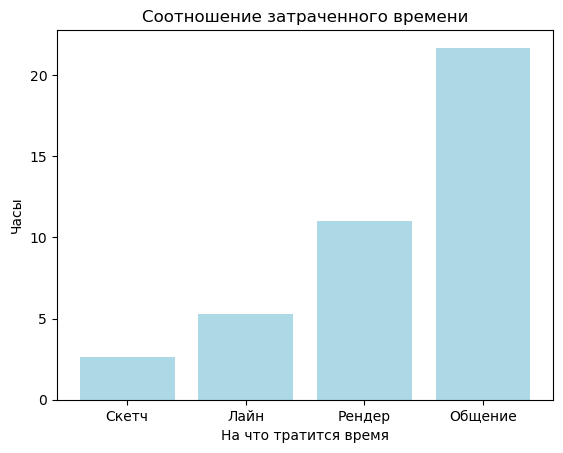

In [171]:
project_data = project_data.sort_values(by='Затраты времени', ascending=True)
names = ['Скетч', 'Лайн', 'Рендер', 'Общение']
values = [np.mean(project_data['Время, скетч'].str.replace(',','.').astype(float)), np.mean(project_data['Время, лайн'].str.replace(',','.').astype(float)), np.mean(project_data['Время, рендер'].str.replace(',','.').astype(float)), np.mean(project_data['Время, общение с заказчиком'].str.replace(',','.').astype(float))]
plt.bar(names, values, color='lightblue')
plt.title('Соотношение затраченного времени')
plt.xlabel('На что тратится время')
plt.ylabel('Часы')
plt.savefig('histogram2.png', bbox_inches='tight')
plt.show()

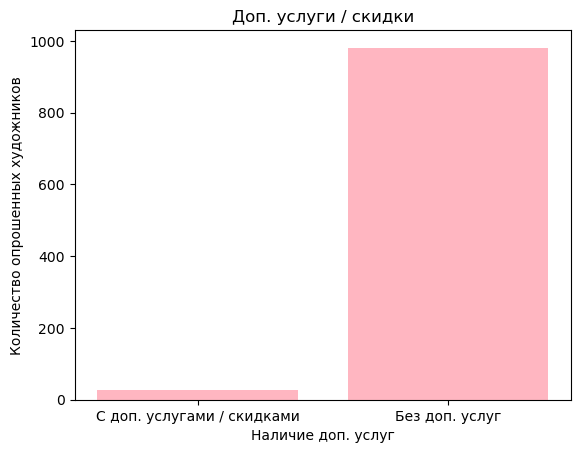

In [198]:
keys = ['С доп. услугами / скидками', 'Без доп. услуг']
values = [0, 0]
for i in project_data['Скидки/доплаты'].isnull():
    if i == True:
        values[1] += 1
    else:
        values[0] += 1
#print(keys)
plt.bar(keys, values, color='lightpink')
plt.title('Доп. услуги / скидки')
plt.xlabel('Наличие доп. услуг')
plt.ylabel('Количество опрошенных художников')
plt.savefig('histogram3.png', bbox_inches='tight')
plt.show()